# Load Data

In [469]:
import pandas as pd 
import numpy as np

path = "data/"
df = pd.read_csv(path+"cardio_train.csv", sep=";")
df["year"] = df["age"].map(lambda days: int(days/365.25) )
df.drop(columns="id", inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


*Rows : 70k*
- Patients

*Columns : 14*
- id : Patient Identifier
- age : Age meassured in days
- year : Age meassured in years (Aproximated)
- height : Meassured in cm
- weight : Measured in kg
- gender : 1 Female , 2 Male
- ap_hi : Systolic blood pressure, the preassure of the blood while the heart is pumping aka beating
- ap_lo : Diastolic blood pressure, the preass of the blood while the heart is resting between beats
- cholesterol : Blood cholestrol(?), 1: normal, 2: above normal, 3: well above normal 
- gluco : Blood glucose(?), 1: normal, 2: above normal, 3: well above normal 
- smoke : Smoking, 1 Yes, 0 No
- alco : Alcohol intake, 1 Yes, 0 No (How Much?)
- active : Physicaly activity, 1 Yes, 0 No (How Much?)
- cardio : Presence or absence of cardiovascular disease, 1 Yes, 0 No

Note that it's not stated by the author of the set if 1 = Yes and 0 = No when it comes to the binary vaiables of smoke, alco, active and cardio. I base this on a the accompanied discussion thread where the user stated these as facts, but they have yet to be vertified. 

Also note that there is no definition of how much/often someone has to smoke drink or be physical active to be classified as a 1.

# EDA
___

In [470]:
import matplotlib.pyplot as plt

# Color pallet
cpa="#8C0000,#A80000,#C60013,#E32227,#0091C5,#0079AC,#006194".split(",")

custome_style={
    "axes.titlecolor":"ffffff",
    "axes.labelcolor":"ffffff",
    "axes.edgecolor": "ffffff", # Spine
    "axes.facecolor": "1f1f1f", 

    "axes.titlesize":12,

    "font.size":20,
    "text.color":"ffffff",

    "figure.facecolor":"1f1f1f", 
    "figure.dpi":150,
    "ytick.color": "ffffff",
    "ytick.labelsize": 15,
    "xtick.color": "ffffff",
    "xtick.labelsize": 15,
    

    "axes.axisbelow": True, # Makes sure the grid is behind the plots
    "axes.grid": True,
    'grid.alpha': .2,
    'grid.color': 'ffffff',
    'grid.linestyle': '-',
    'grid.linewidth': 1,

    'legend.labelcolor': 'ffffff', # Font color
    'legend.edgecolor': 'ffffff', # border
    'legend.fontsize': 16,


    "axes.edgecolor": "ffffff",

    'boxplot.capprops.color': 'ffffff', # The top of the T line
    'boxplot.whiskerprops.color': 'ffffff',# The middle of the T line
    'boxplot.boxprops.color': 'ffffff', # The box line
    'boxplot.medianprops.color': 'ffffff',
    'boxplot.medianprops.linestyle': '-',
    'boxplot.medianprops.linewidth': 1.0,

    'boxplot.flierprops.marker': 'o',   
    'boxplot.flierprops.markeredgecolor': '1f1f1f',
    'boxplot.flierprops.markeredgewidth': .4,
    'boxplot.flierprops.markerfacecolor': 'ffffff', # set for each boxplot
    'boxplot.flierprops.markersize': 4.0,

}

for key, val in custome_style.items(): plt.rcParams[key]=val
wpr={"edgecolor":"#ffffff",'linewidth':1, 'linestyle': '-', 'antialiased': True}


[(0.0, 42025.2)]

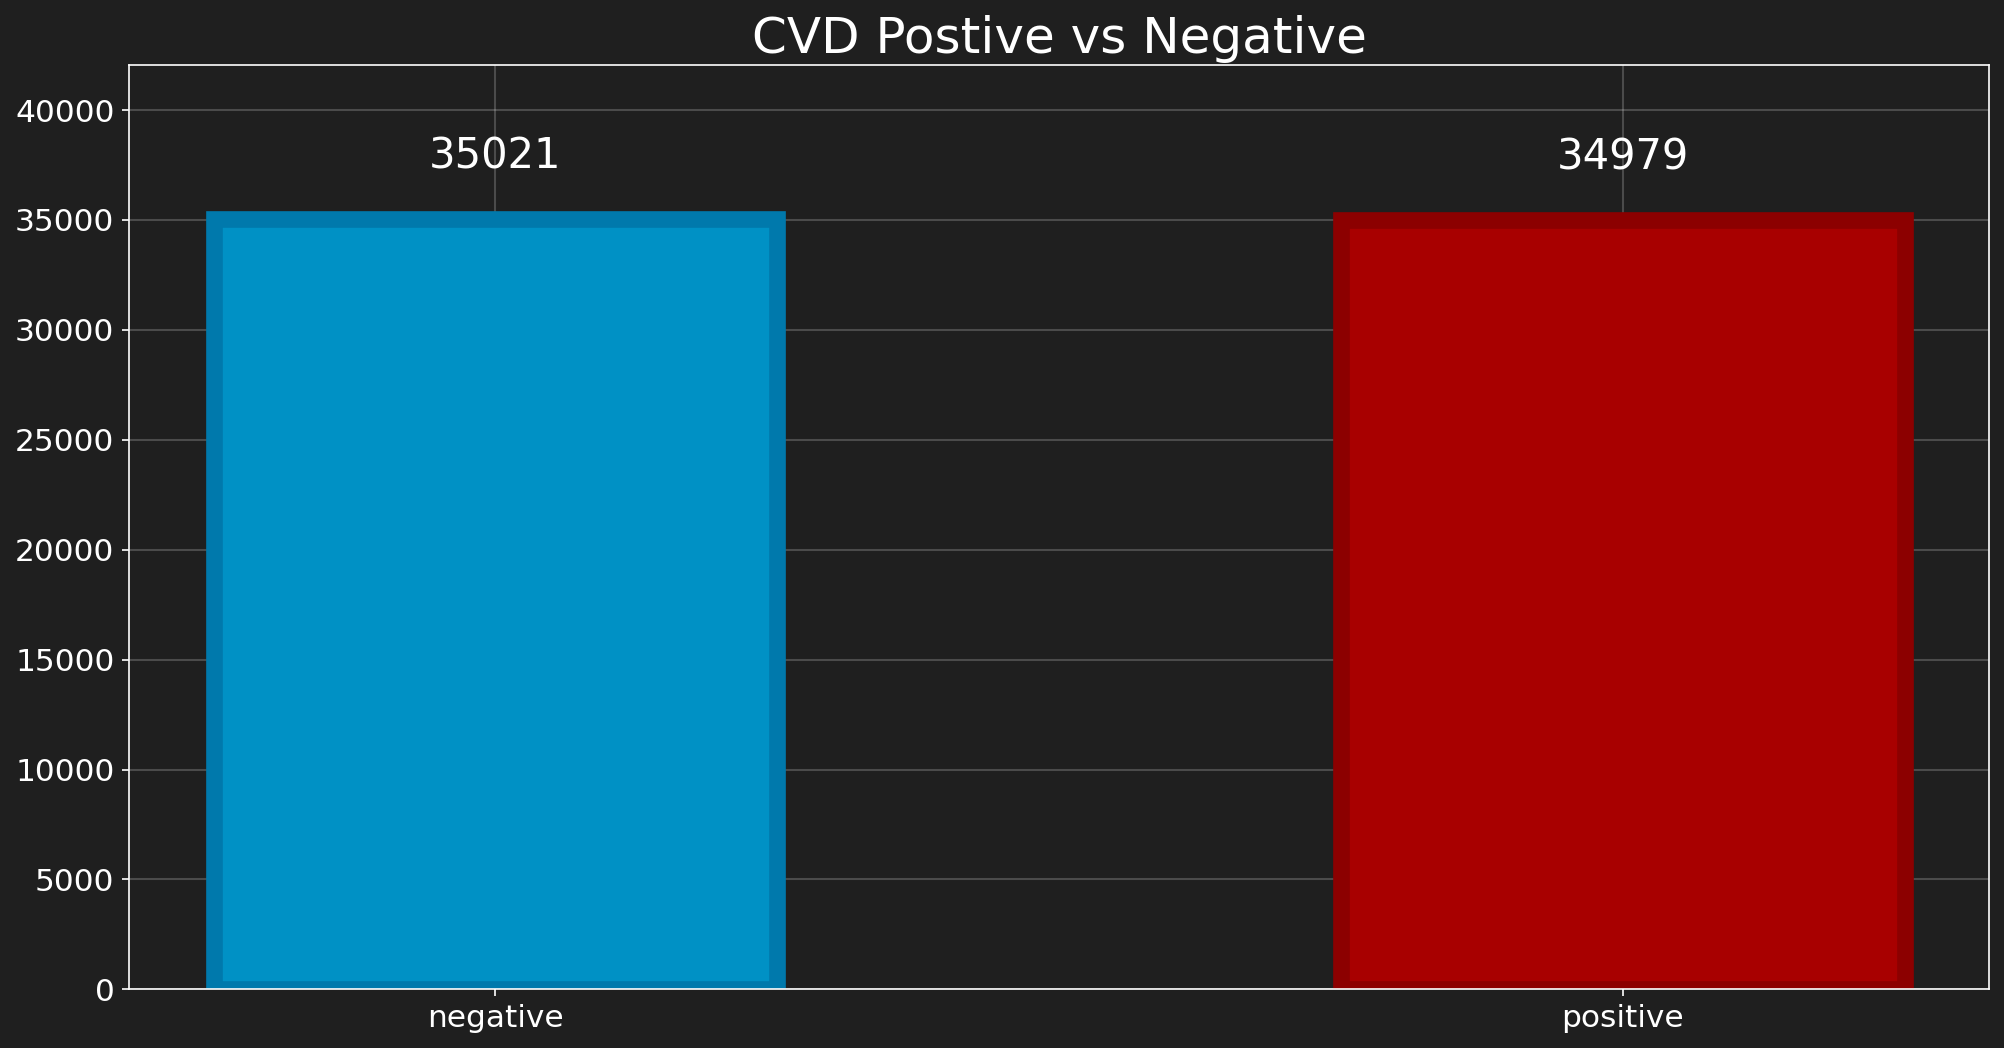

In [471]:


# Group
# 1) Turns your df in to a multi index series
dfg = df.groupby("cardio")["cardio"].count()

# 2) Coverts it back in to a series
dfg = dfg.to_frame("count")

# 3) Flattens it, each row now consists of group, attribute, value
dfg = dfg.reset_index()

dfg["cardio"] = dfg["cardio"].map(lambda x: {0:"negative", 1:"positive",}[x])
dfg.set_index("cardio", inplace=True)
dfg

fig, ax = plt.subplots(figsize=(16, 8));
axis = ax.bar(dfg.index, dfg["count"], width=.5, color=[cpa[-3],cpa[1]], edgecolor=[cpa[-2],cpa[0]], linewidth=8)
ax.bar_label(axis, padding=20)
ax.set_title("CVD Postive vs Negative", fontsize=24)
ax.set(ylim=(0, max(dfg["count"])*1.2), )



We can see that we have around 35020 patients have tested negative and 34980 that have tested posetive for CVD, almsot a 50/50 split. As this is our target variable, a 50/50 split is a good thing as balanced data tend to produce more accurate classifications.

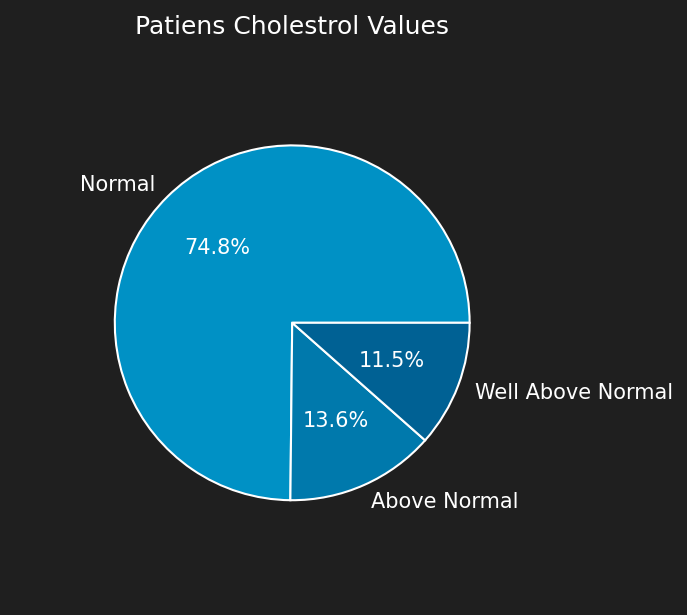

In [472]:
cholesterol = df.groupby("cholesterol").count()


fig = plt.figure( )
fig = plt.pie(cholesterol["gender"], labels=["Normal", "Above Normal", "Well Above Normal"],  autopct="%1.1f%%",
              radius=0.8, wedgeprops=wpr, 
              textprops=dict(color="white", size=10), colors=[cpa[-3], cpa[-2], cpa[-1]  ])
fig = plt.title("Patiens Cholestrol Values", fontsize=12)
       

By defenition most patient should have normal cholestrol, however one might expect Well Above Normal should only be 75% the size of Above normal if this followed an exponentional type distribution.

Text(0.5, 0, 'Age')

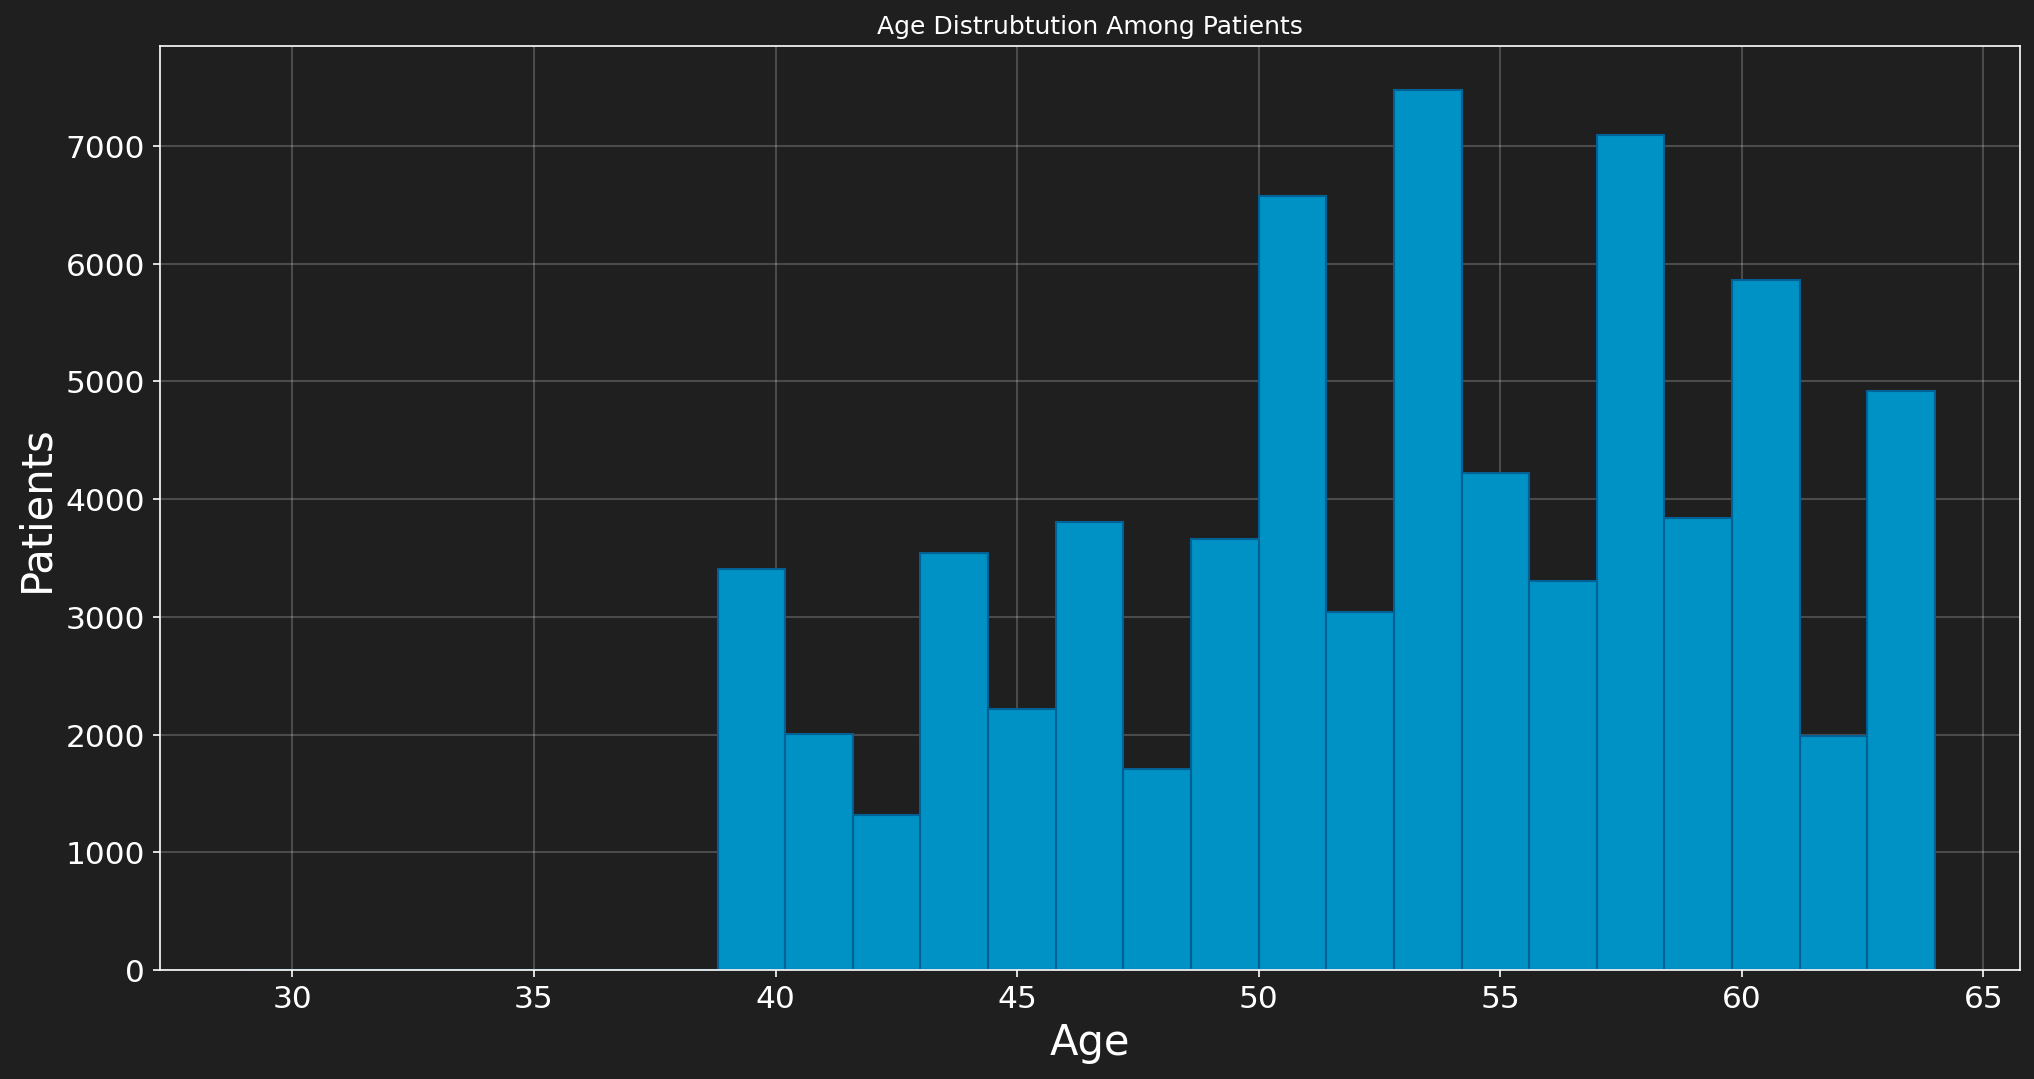

In [473]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(df["year"], bins=25, color=cpa[-3], edgecolor=cpa[-1], linewidth=1);
ax.set_title("Age Distrubtution Among Patients")
ax.set_ylabel("Patients")
ax.set_xlabel("Age")


Age 38-48 looks almost like a uniform distribution, From age 50 to 62 the distribution looks like a normal distribution but then there is a big spike around 63-64. This might indicate that there are three different primary reasons why the patients are admittetd and that's why we don't see a distribution closer to a normal or exponential one. 

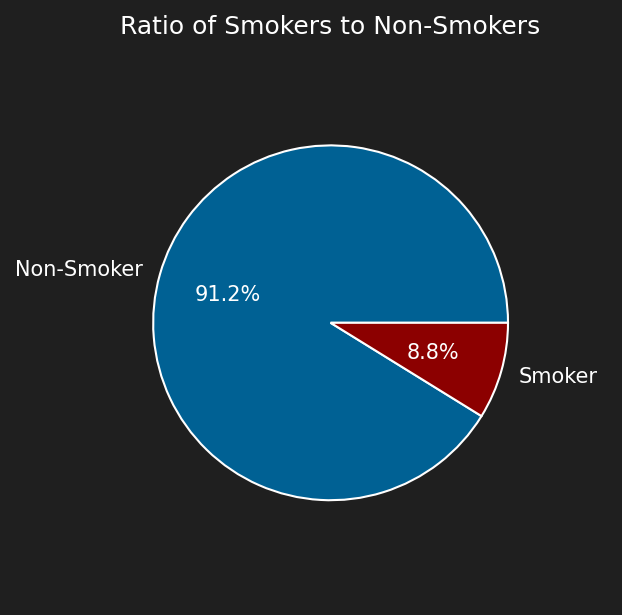

In [474]:
smoke = df.groupby("smoke").count()


fig, ax = plt.subplots()
ax = plt.pie(smoke["gender"], labels=["Non-Smoker", "Smoker"],  autopct="%1.1f%%", radius=0.8,
              wedgeprops={"edgecolor":"#ffffff",'linewidth':1, 'linestyle': '-', 'antialiased': True},              
              textprops=dict(color="white", size=10), colors=[cpa[-1], cpa[0]  ])
ax = plt.title("Ratio of Smokers to Non-Smokers")

Only nine percent of the patients are smokers, this will make it harder to draw conclusions about the effect smoking has one CVDs this might not have posed such a big problem if the data set had been larger. If we had 10k smokers then we could hade taken multiple random samples from both the smokers and non-smokers and compared the same sized samples against each other. But in this case, with only around 6k smokers, the sample sizes might be to small to be reliable. 

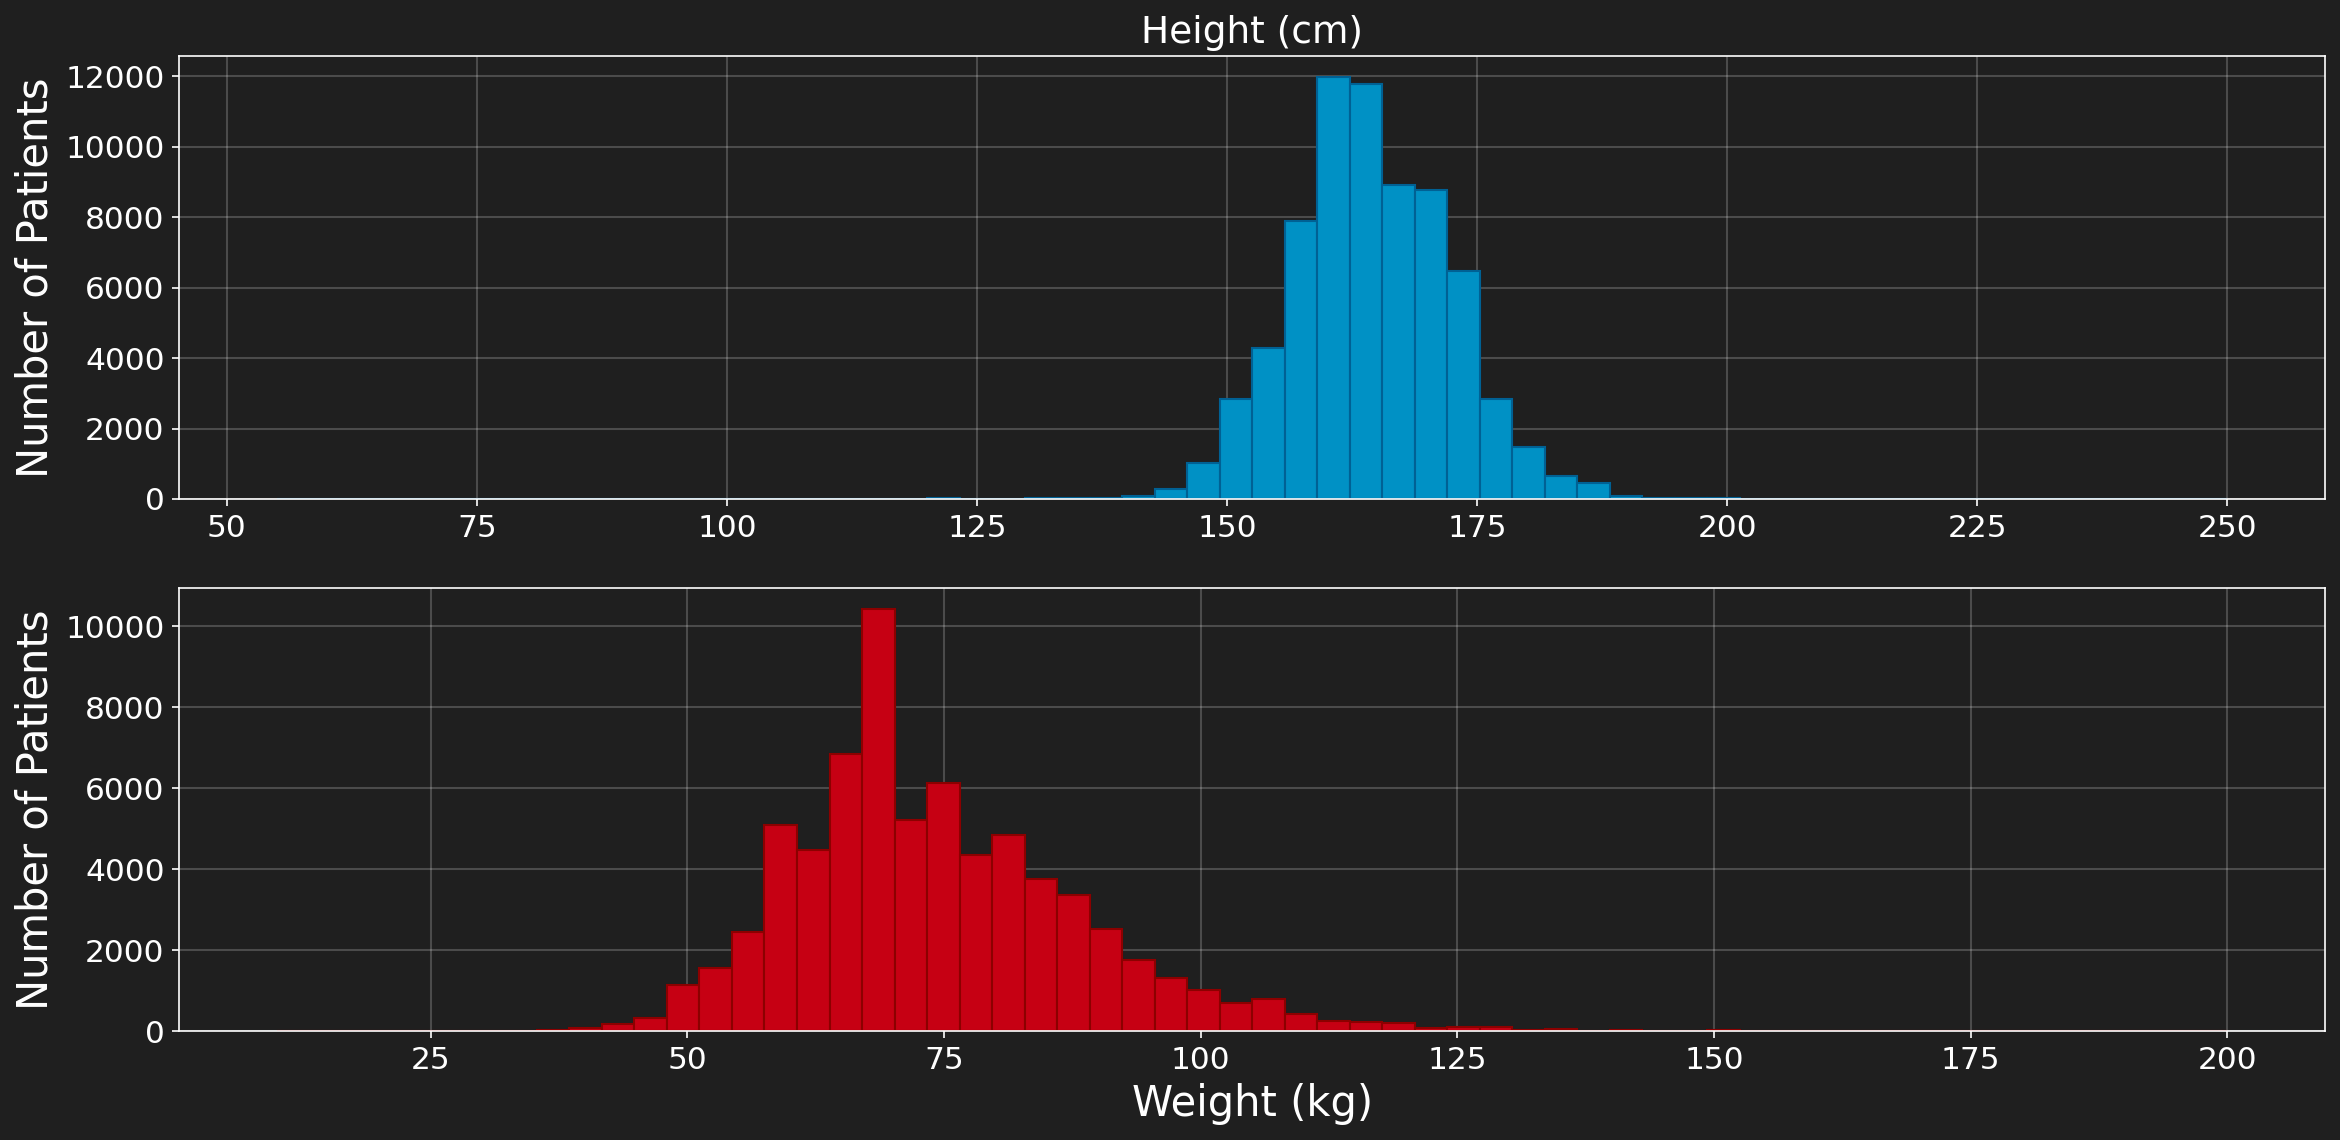

In [475]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
ax1.hist(df["height"], bins=60, color=cpa[-3], edgecolor=cpa[-1], linewidth=1)
#ax1.set_title("Height Distribution")
ax1.set_ylabel("Number of Patients")
ax1.set_title("Height (cm)", fontsize=18)
ax2.hist(df["weight"], bins=60, color=cpa[2], edgecolor=cpa[0], linewidth=1)
#ax2.set_title("Weight Distribution")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Weight (kg)")
plt.tight_layout()
plt.show()



Height follows normal distribution, perhaps slightly scewed to the left.
Weight looks similar to a normal distrubution except it has a huge spike around 70 kg, 
it also has slightly longer slope on the right side which whould be more inline with a 
gamma distribution.

   gender    cardio  count
0  female  negative  12363
1  female  positive  12107
2    male  negative  22616
3    male  positive  22914
0    12363
2    22616
Name: count, dtype: int64
1    12107
3    22914
Name: count, dtype: int64


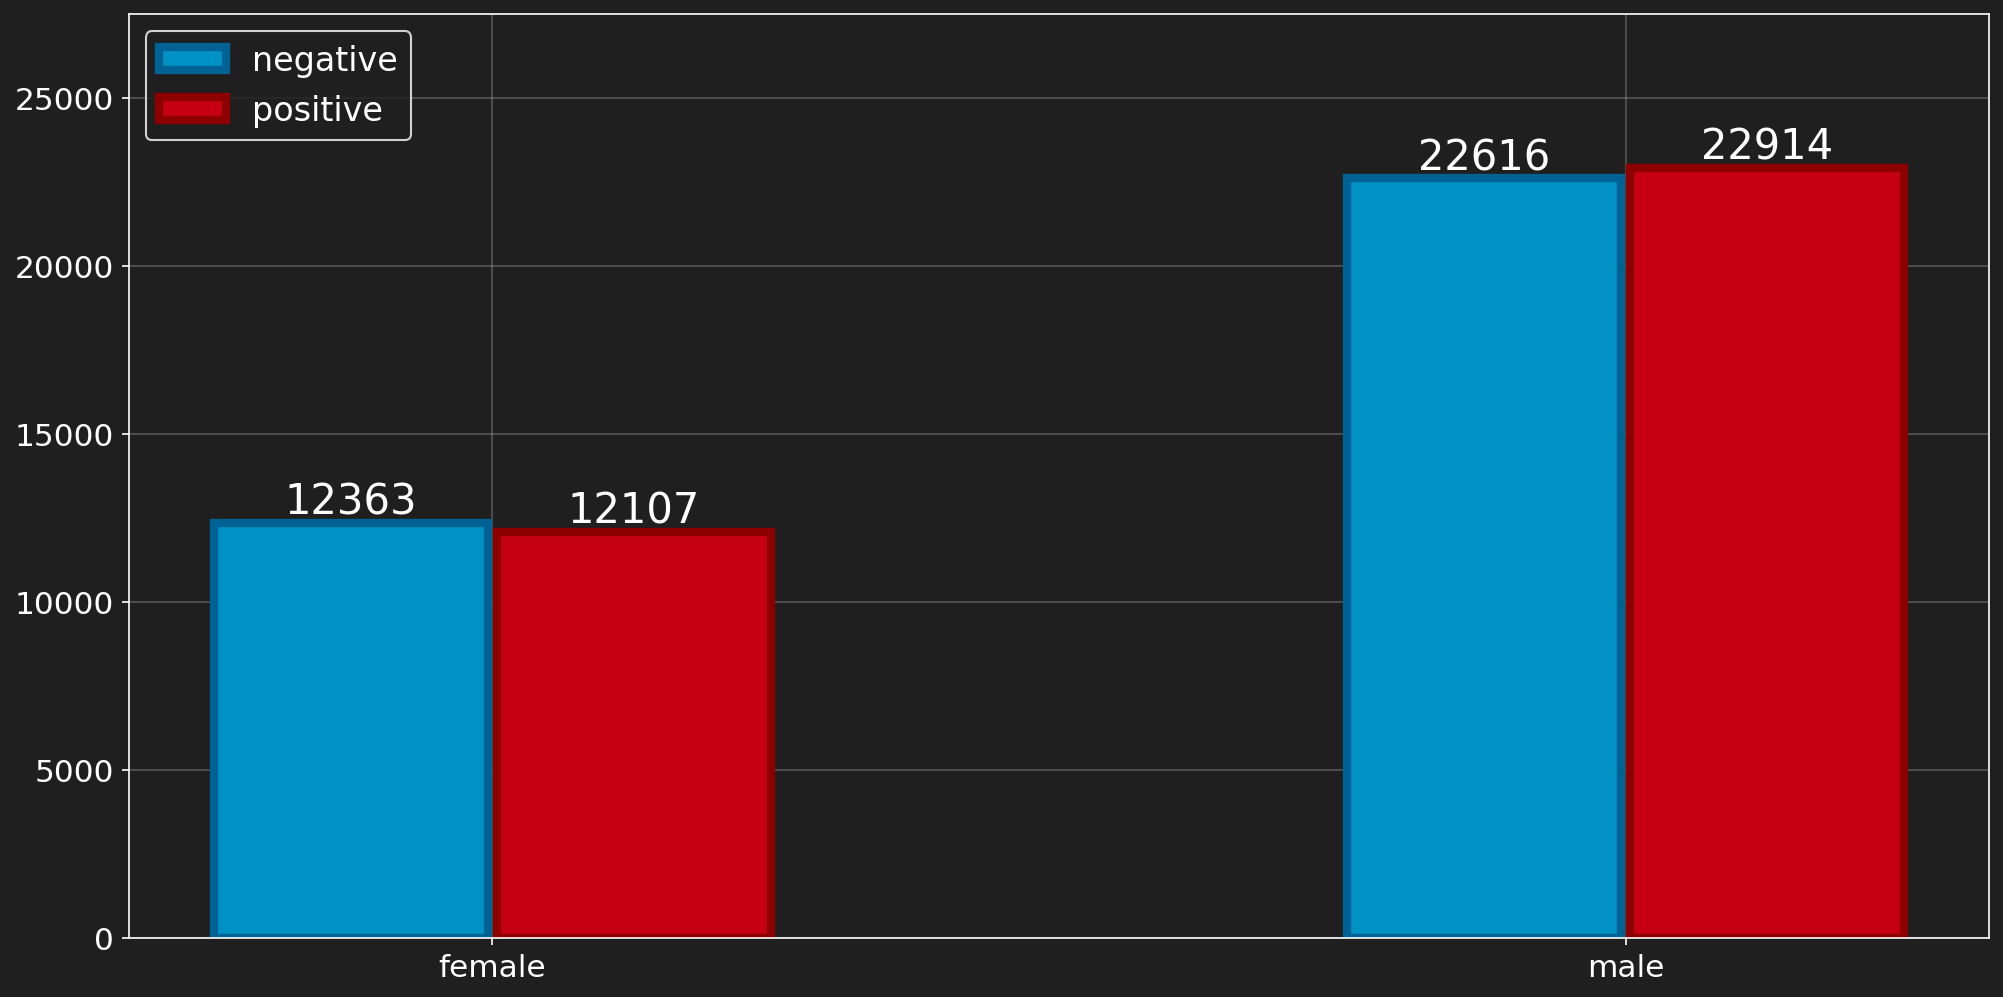

In [476]:

def label_discreet(df, column_key_label):
    df = df.copy(deep=True)
    for key, val in column_key_label.items():
        #print(key, val)
        df[key] = df[key].map( lambda x: val[x])
    return df

dfg = label_discreet(df, {
    "gender":{2:"female", 1:"male"},
    "cardio":{0:"positive", 1:"negative"}
})



def group_and_plot(df, group, attribute):
    df = df.copy( deep=True )

    # Group
    # 1) Turns your df in tu a multi index series
    df = df.groupby([group,attribute], as_index=True)[attribute].count()
    # 2) Coverts it back in to a series
    df = df.to_frame("count")
    # 3) Flattens it, each row now consists of group, attribute, value
    df = df.reset_index()
    
    print(df)
    # Plot 
    # 1) 
    width = 0.25
    x = np.arange( len(df[attribute].unique()) ) 
    fig, ax = plt.subplots(figsize=(16, 8))
    color=(cpa[-3], cpa[2])
    edgecolor=(cpa[-1], cpa[0])
    linewidth=4

    for n, idx in enumerate(df[attribute].unique()): 
        y = df[df[attribute] == idx]["count"]
        print(f"{y}")
        axis = ax.bar( x+width*n, y, width-linewidth/500,  color=color[n], edgecolor=edgecolor[n], linewidth=linewidth )
        ax.bar_label(axis)
    ax.set_xticks(x+width/len(x), df[group].unique())
    ax.set_ylim(0,max(df["count"])*1.2)
    ax.legend( labels=df[attribute].unique())
    plt.show()

group_and_plot(dfg, "gender", "cardio")



It's very even but the female patients are slightly less likely to be diagnosed with CVD while male patients have are slightly more likley to be given a positive diagnosies. But he most remarkable thing is the disparity between male and female patients, if these where complete random samples taken from a say a town or a country then in most caese we would expect the ration to be 50/50, but this is not the case here. This is presents a huge problem when it comes to things like removing outlisrs because we have no way no reference to base our descion on. Because we dont know how, from where or when the patients have been selected we have no way of knowing if there is a huge selection bias in the data.

# Feature Engineering BMI
___

https://ki.se/forskning/popularvetenskap-och-dialog/popularvetenskapliga-teman/tema-overvikt-och-fetma/fakta-om-fett

Text: Fredrik Hedlund, publicerad i tidskriften Medicinsk Vetenskap nummer 4, 2014.

Innehållsgranskare:
Cecilia Odlind

Sidan uppdaterad:
2025-02-10


Text: Fredrik Hedlund, publicerad i tidskriften Medicinsk Vetenskap nummer 4, 2014.


BMI-gränser
”Body Mass Index”, BMI, räknas ut genom att vikten divideras med längden i kvadrat.

Undervikt <18,5
Normalvikt 18,5-24,9
Övervikt 25-29,9
Obesitas 30-34,9
Svår obesitas 35-39,9
Extrem obesitas >40



Formel
https://ki.se/forskning/popularvetenskap-och-dialog/medicinvetarna-en-podd-om-kis-forskning/medicinvetarna-156-hur-behandla-obesitas

*) Formeln för att räkna ut BMI är vikten genom längden gånger längden. En person som är 1,75 lång och väger 83 kilo får ett BMI på drygt 27, till exempel (83/(1,75X1,75)=27,12).




https://www.psychiatriapolska.pl/pdf-126233-81794?filename=81794.pdf
Lowest BMI recorede
6.7


Higherst BMI recorded
251.1
https://en.wikipedia.org/wiki/List_of_heaviest_people



Outliers
https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

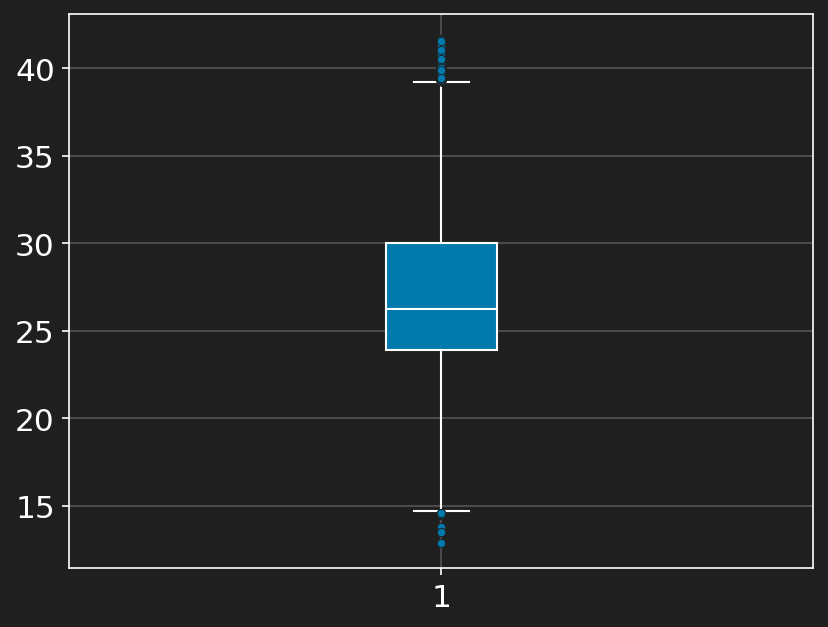

(68712, 15)

In [477]:
# Reload Data
df = pd.read_csv(path+"cardio_train.csv", sep=";")
df["year"] = df["age"].map(lambda days: int(days/365.25) )
df.sort_values("id", inplace=True)
df["bmi"] = df["weight"].values / np.square( df["height"].values/100 )

# lowest_ever_recorded_bmi = 6.7
# highest_ever_recorded_bmi = 251.1
# underweight = 18.5
# morbidly_obese = 40 
# outliers_low = (lowest_ever_recorded_bmi+underweight)/2
# outliers_high = (highest_ever_recorded_bmi+morbidly_obese)/2



def drop_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3-Q1
    return df[ (df[column]>=Q1-(IQR)*1.8) &  (df[column]<=Q3+(IQR)*1.8) ]
df = drop_outliers(df, "bmi")


# # Och outliers.. bör göra ett outlires test
# df[  (df["bmi"]<18.5) | (df["bmi"]>40)  ]
# df[  (df["bmi"]<outliers_low)].shape, df[  (df["bmi"]>outliers_high) ].shape
# index =  df[ (df["bmi"]<outliers_low) | (df["bmi"]>outliers_high) ].index

# df.drop(index=index, inplace=True)
#df.shape
ax = plt.axes()
# patch_artist fills the boxplot
plot = ax.boxplot( df["bmi"],  patch_artist=True, flierprops={ "markerfacecolor":cpa[-2]} )
plot["boxes"][0].set_facecolor(cpa[-2])
#plot["boxes"][0].set( flierprops={ "markerfacecolor":cpa[-2]} )
plt.show()
df.shape

The highest BMI ever recorded is 251.1(#1) and the lowest is 6.7(#2)
The data contains weight and or height that has falsly recorded or falsly inputed because we have patients with 
a BMI higher respectively lower then these values.
It seems reasonable to assume that not all values that are inside the scope of 6.7 to 251.1 are correct even 
though technically they are possible. 

As base the Q-method(#3) base of IQR*1.5 is used in order to remove some of the outliers, the multiplication operator 
is then adjusted to a point where the outlier excieeds the BMI scale to account for some extreeme cases. 
This method removes 1288 patients 1.84% 



Old Remove
To calculate the threshold under/over which the outliers will be removed the BMI number for underweight/extreme obisity was combined with the lowest/highest ever recorded BMI, the result was then divided by two, everything belowe/above this aka 9 and 16 patients respectively weher removed. All though not impossible that patient actually have a BMI below/above
the threshold it is unlikely.


In [478]:

# Switch 
# 1) Loops through a dict 
# 2) uses its keys in an lambda if test 
# 3) if the tests succeeds the value from the key value pair is picked
# 4) if it fails the result is set to the default value
def switch(values, exp, di, default):
    results = list()
    for val in values:
        for key in di.keys():
            result = di[key] if exp(val,key) else default 
            if result != default : break
        results.append(result) 
    return results

# (?) Should you have an under weight class
bmi_grade = {
    40:"obese (class 3)",
    35:"obese (class 2)",
    30:"obese (class 1)",
    25:"over weight",
    18.5:"normal range",
}

df["bmi_category"] = switch(df["bmi"], lambda x,y: x>y, bmi_grade, "under weight")



In [479]:
df.groupby("bmi_category").count()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,bmi
bmi_category,,,,,,,,,,,,,,,
normal range,25804,25804,25804,25804,25804,25804,25804,25804,25804,25804,25804,25804,25804,25804,25804
obese (class 1),12211,12211,12211,12211,12211,12211,12211,12211,12211,12211,12211,12211,12211,12211,12211
obese (class 2),4390,4390,4390,4390,4390,4390,4390,4390,4390,4390,4390,4390,4390,4390,4390
obese (class 3),593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
over weight,25073,25073,25073,25073,25073,25073,25073,25073,25073,25073,25073,25073,25073,25073,25073
under weight,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641


In [480]:
# Reomve Outliers pa_hi pa_lo 
#https://uaps2024.popconf.org/uploads/191489
# 95th 183 99th 202 + 8
# 5th 95 -5
# 95th 106 99th 118 + 7
# 5th 60 -5
# Systolic Blood Pressure (SBP) and the Diastolic Blood Pressure (DBP)

##https://www.sciencedirect.com/science/article/abs/pii/S1933171118303085


df[ (df["ap_hi"] > 210) | (df["ap_hi"]<90)] 
df[ (df["ap_lo"] > 120) | (df["ap_lo"]<55)] 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,bmi,bmi_category
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,47,29.263340,over weight
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,60,24.341758,normal range
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,49,36.888889,obese (class 2)
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,64,20.338326,normal range
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,51,34.154158,obese (class 1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1,63,29.043709,over weight
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1,59,24.238227,normal range
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1,58,33.659297,obese (class 1)
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0,61,28.305995,over weight


In [481]:
#https://my.pbrc.edu/Clinic/Tools/BMI/

In [482]:



# Switch 
# 1) Loops through a dict 
# 2) uses its keys in an lambda if test 
# 3) if the tests succeeds the value from the key value pair is picked
# 4) if it fails the result is set to the default value
def switch(df, values, exp, di, default):
    results = list()
    for row in df: 
        for key in di.keys():
            result = di[key] if exp(val,key) else default 
            if result != default : break
        results.append(result) 
    return results

scale = 1.65

# (?) should I adjuset DIASTOLIC for healthy? 
# SYSTOLIC|DIASTOLIC|BLOOD PREASSURE CATEGORY
blood_preasure_grade = {
    (180, 120):"Hypertension Crisis",
    (140, 90):"Hypertension Stage 2",
    (130, 80):"Hypertension Stage 1",
    (120, 80):"Elevated",
}

#switch( df=df, values=("ap_hi", "ap_lo"), exp=,  di=blood_preasure_grade,  default="Healthy")
# (100/120)*80  ~ 62.5
# (100/180)*120 ~ 62.5
1.625
#df.head(20)

1.625

# Feature engineering blodtryck
___

(68712, 16)
(68192, 16)
(67220, 16)


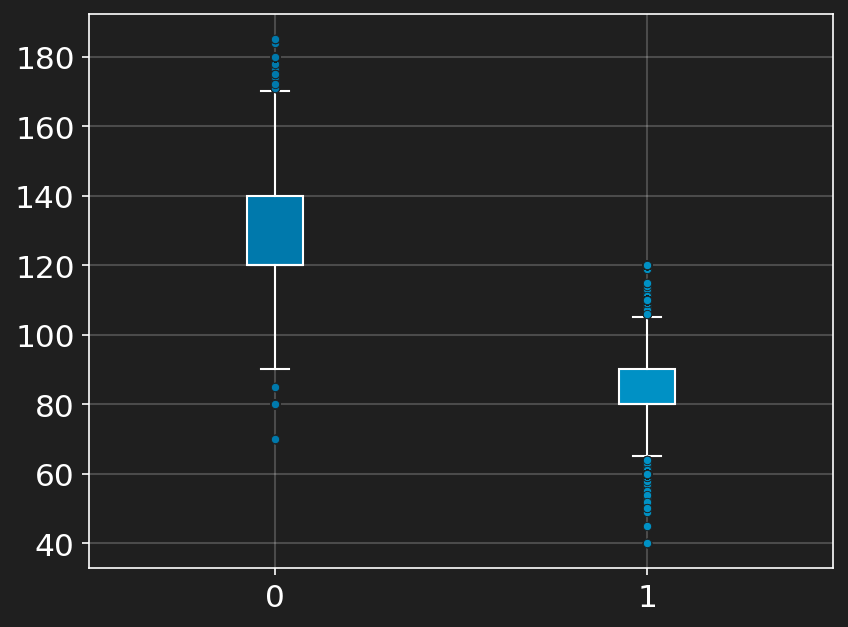

In [483]:

# https://my.clevelandclinic.org/health/diseases/21156-low-blood-pressure-hypotension
low_blood_preasure = (90,60) 
df[ df["ap_hi"]<0 ]
# Need to motivate the pick
# Should I adjust the percentile or the multiplier

print(df.shape)

# Duplicated function
def drop_outliers(df, column):
    Q1 = np.percentile(df[column], 18)
    Q3 = np.percentile(df[column], 78)
    IQR = Q3-Q1
    return df[ (df[column]>=Q1-(IQR)*1.5) &  (df[column]<=Q3+(IQR)*1.5) ]
df.index= range(len(df)) 
df.reset_index(drop=True, inplace=True) 
df = drop_outliers(df, "ap_hi")
print(df.shape)
df = drop_outliers(df, "ap_lo")
print(df.shape)


ax = plt.axes()
# patch_artist fills the boxplot
for n, col in enumerate(["ap_hi", "ap_lo"]):
    plot = ax.boxplot( df[col], positions=[n],  patch_artist=True, flierprops={ "markerfacecolor":cpa[-2-n]} )
    plot["boxes"][n-1].set_facecolor(cpa[-2-n])
#plot["boxes"][0].set( flierprops={ "markerfacecolor":cpa[-2]} )
plt.show()


Note that I have to do some more research to find what is possible

1 Check what is possiblie to have and still walk around
2 Checke what is consider low and what is considerd high
3 take the average of these two

In [484]:




# 1) In order to combine ap_hi and ap_lo in to one value so that they can 
#    be evalueate togehter one of them has to be rescaled so they both 
#    hold equal weight
# (100/120)*80  ~ 62.5
# (100/180)*120 ~ 62.5
# scale = 1.625
scale = 1.65


# 2) Scale ap_lo and combine with ap_hi in order to get one value to evaluate
exp_combine = lambda row: row["ap_hi"] + row["ap_lo"]*scale
values = df.apply(exp_combine, axis=1)

# 3) Creates a dictionary where the keys are the combined ap_hi + ap_lo*scale 
#    and the values are the grades
los = (120, 90, 80, 80, 0)
his = (180, 140, 130, 120, 0)
grades = ("Hypertension Crisis", "Hypertension Stage 2", "Hypertension Stage 1", "Elevated", "Healthy")
blood_preasure_grade = { (lo+hi*scale):grade for lo, hi, grade in zip(los, his, grades) }

# 4) Using list comprehension we check each value agains each key, 
#    if the value is greater then the key the key is returned 
#    we then grab the highest value key and use it to return
#    the coresponding value from the dictionary.
results = [ blood_preasure_grade[max( key for key in blood_preasure_grade.keys() if val > key)] for val in values ]

df["bp_category"] = results
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,bmi,bmi_category,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,normal range,Healthy
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,obese (class 1),Elevated
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,normal range,Healthy
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,over weight,Hypertension Stage 1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,normal range,Healthy


# Visualiseringar andel sjukdomar
___

In [485]:
df.columns.to_list()

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'year',
 'bmi',
 'bmi_category',
 'bp_category']

In [486]:
df["bmi_category"].value_counts().keys().to_list()

['normal range',
 'over weight',
 'obese (class 1)',
 'obese (class 2)',
 'under weight',
 'obese (class 3)']

      cardio     bmi_category  count
0   negative     normal range  10095
1   negative  obese (class 1)   7092
2   negative  obese (class 2)   2821
3   negative  obese (class 3)    401
4   negative      over weight  12365
5   negative     under weight    171
6   positive     normal range  15318
7   positive  obese (class 1)   4779
8   positive  obese (class 2)   1382
9   positive  obese (class 3)    164
10  positive      over weight  12168
11  positive     under weight    464
0    10095
6    15318
Name: count, dtype: int64
1    7092
7    4779
Name: count, dtype: int64
4     12365
10    12168
Name: count, dtype: int64
2    2821
8    1382
Name: count, dtype: int64
5     171
11    464
Name: count, dtype: int64
3    401
9    164
Name: count, dtype: int64
     cardio           bp_category  count
0  negative              Elevated   7826
1  negative               Healthy  18129
2  negative  Hypertension Stage 1   4993
3  negative  Hypertension Stage 2   1997
4  positive              Elevated 

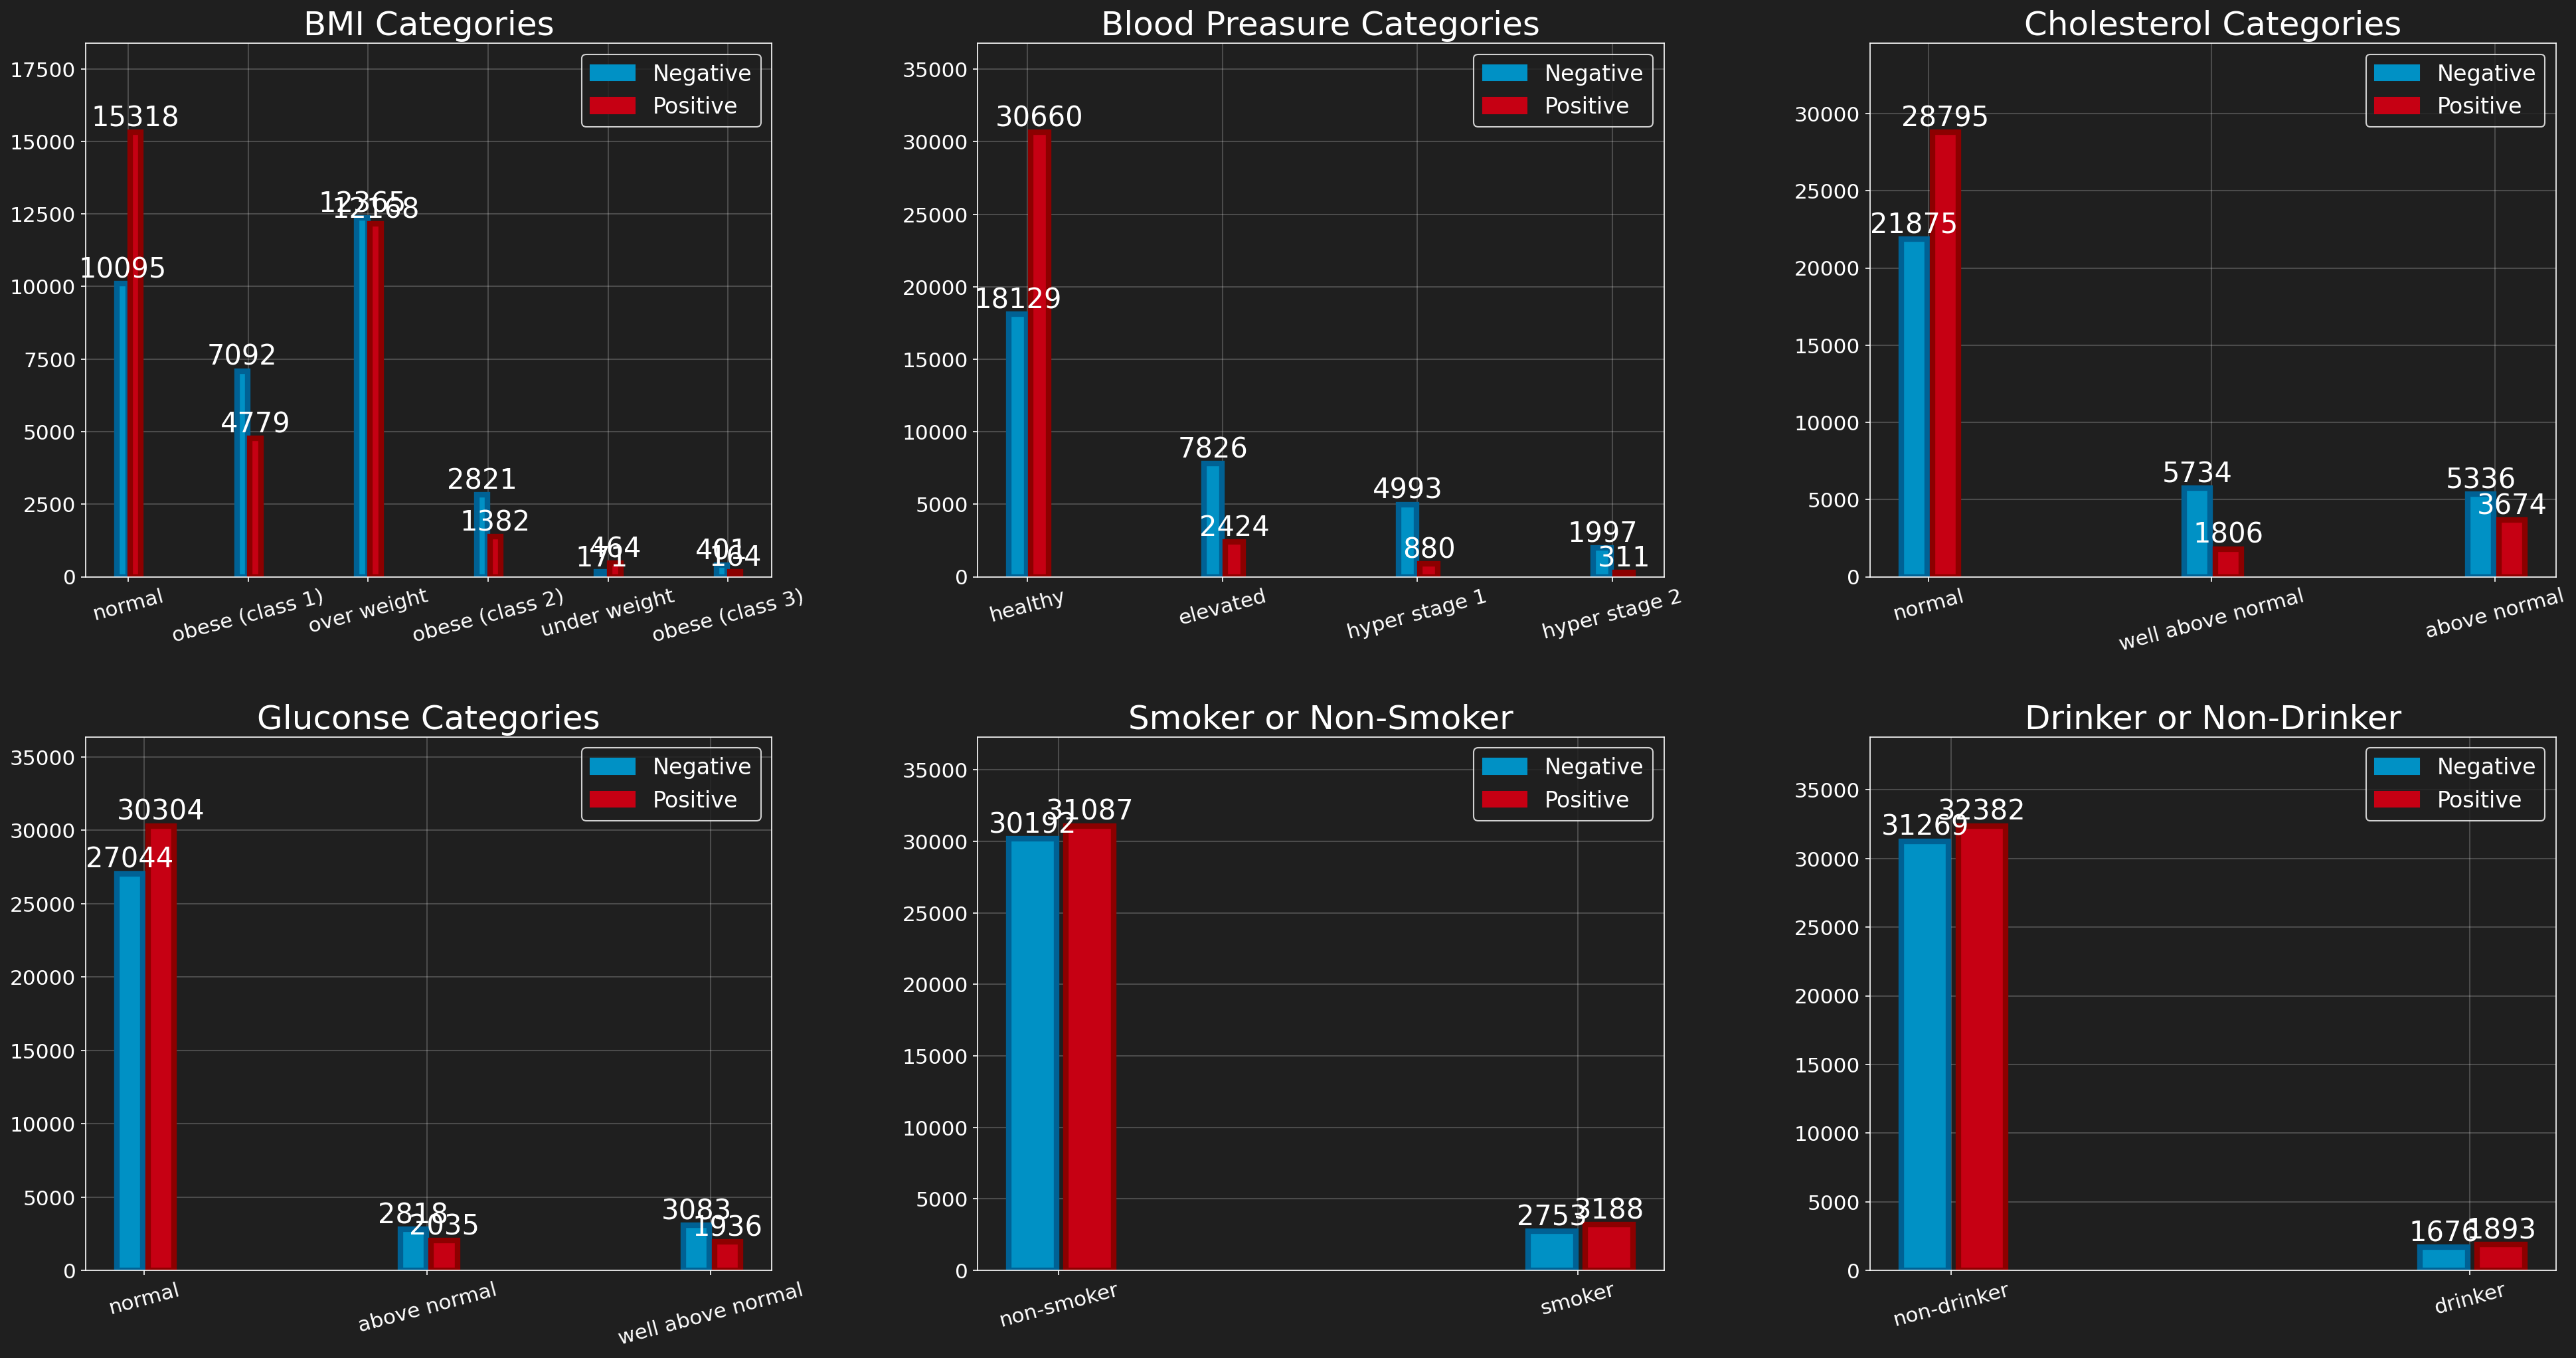

In [487]:
import matplotlib.patches as mpatches

def grouping(df, group, attribute):
    # Group
    # 1) Turns your df in to a multi index series
    df_group = df.groupby([group,attribute], as_index=True)[attribute].count()
    # 2) Coverts it back in to a series
    df_group = df_group.to_frame("count")
    # 3) Flattens it, each row now consists of group, attribute, value
    df_group = df_group.reset_index()
    return df_group

def plot(df, group, attributes, x_labels):
    
    width = 0.10
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(32, 16))
    color=(cpa[-3], cpa[2])
    edgecolor=(cpa[-1], cpa[0])
    linewidth=4
    ax=ax.flatten()
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    titles=["BMI Categories", "Blood Preasure Categories", "Cholesterol Categories", "Gluconse Categories", "Smoker or Non-Smoker", "Drinker or Non-Drinker"]

    for i, axi in enumerate(ax):
        df_group = grouping(df, group, attributes[i])
        print(df_group)
        #print(df_group[df_group.columns[1]])
        #print(df_group)
        x = np.arange( len(df[group].unique()) ) 
        xx = np.arange( len(df[attributes[i]].unique()) ) 
        for j, idx in enumerate(df[attributes[i]].unique()): 
      
            y = df_group[df_group[attributes[i]] == idx]["count"]
            print(y)
            #print((x+j)+np.array([1,.1]))

            axis =axi.bar( (x+j)+np.array([0,-0.89]), y, width-linewidth/500,  color=color, edgecolor=edgecolor, linewidth=linewidth )

            axi.bar_label(axis)
        axi.set_xticks(xx+width/2, x_labels[i], rotation=15)
        axi.set_ylim(0,max(df_group["count"])*1.2)
        blue_patch = mpatches.Patch(color=color[0], label="Negative")
        red_patch = mpatches.Patch(color=color[1], label="Positive")
        #axi.legend( labels=df_group[group].unique())
        axi.legend( handles=[blue_patch, red_patch])
        axi.set_title(titles[i], fontsize=24)
    plt.show()


df_group = label_discreet(df, {
    "cardio":{0:"positive", 1:"negative"},
    "alco":{0:"non-drinker", 1:"drinker"},
    "smoke":{0:"non-smoker", 1:"smoker"},
    "cholesterol":{1:"normal", 2:"above normal", 3:"well above normal"},
    "gluc":{1:"normal", 2:"above normal", 3:"well above normal"},
})

x_labels=[
    ["normal", "obese (class 1)", "over weight", "obese (class 2)", "under weight", "obese (class 3)"],
    ["healthy", "elevated", "hyper stage 1", "hyper stage 2"],
    ["normal", "well above normal", "above normal"],
    ["normal", "above normal", "well above normal"],
    ["non-smoker", "smoker"],
    ["non-drinker", "drinker"],
]

features=["bmi_category", "bp_category", "cholesterol", "gluc", "smoke", "alco"]

plot(df_group, "cardio", features, x_labels)




The intresting thing about BMI that it does not follow an geometric distrubtion as one 
might assume as class II seem to break the pattern. But this graph might not tell the 
whole truth as we don't have classes for patient below normal range. If we had 
we might expect to see a distribution closer to normal distiribution.

Blood preasure is intreasting because most patient have elevated values, far outshadowing 
healthy range. As we can see from the heat map, there is a 0.36 correlation with age which 
might explain why som many patients have elvetated bloodpreasures taken that we don't 
have any patients under the age of 30.

We have a very low reatio of Drinkers and Smokers and that might be why we don't see any correlation between CVD and these two features, in a more even distribution these might have had bigger impact.
Having access to patients from past centuries with higher rates of smoking and drinking might 
have given ous more accuret sens of correlation.


In [488]:
df_heatmap = df.drop( columns=["id", "year", "bmi_category"] )
# Should probably use dummy
cat = { "Hypertension Crisis":4, "Hypertension Stage 2":3, "Hypertension Stage 1":2, "Elevated":1, "Healthy":0}
df_heatmap["bp_category"] = df_heatmap["bp_category"].map( lambda x: cat[x] ) 
df_heatmap.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


array([[ 1.  , -0.02, -0.08,  0.06,  0.21,  0.16,  0.15,  0.1 , -0.05,
        -0.03, -0.01,  0.24,  0.11,  0.13],
       [-0.02,  1.  ,  0.52,  0.19,  0.07,  0.07, -0.03, -0.02,  0.34,
         0.17,  0.  ,  0.01, -0.09,  0.04],
       [-0.08,  0.52,  1.  ,  0.37,  0.03,  0.04, -0.05, -0.02,  0.19,
         0.1 , -0.01, -0.01, -0.18, -0.01],
       [ 0.06,  0.19,  0.37,  1.  ,  0.26,  0.25,  0.13,  0.1 ,  0.08,
         0.07, -0.02,  0.18,  0.84,  0.21],
       [ 0.21,  0.07,  0.03,  0.26,  1.  ,  0.72,  0.19,  0.09,  0.03,
         0.03,  0.  ,  0.43,  0.26,  0.81],
       [ 0.16,  0.07,  0.04,  0.25,  0.72,  1.  ,  0.16,  0.07,  0.02,
         0.04, -0.  ,  0.34,  0.23,  0.75],
       [ 0.15, -0.03, -0.05,  0.13,  0.19,  0.16,  1.  ,  0.45,  0.01,
         0.03,  0.01,  0.22,  0.17,  0.17],
       [ 0.1 , -0.02, -0.02,  0.1 ,  0.09,  0.07,  0.45,  1.  , -0.01,
         0.01, -0.01,  0.09,  0.11,  0.07],
       [-0.05,  0.34,  0.19,  0.08,  0.03,  0.02,  0.01, -0.01,  1.  ,
         

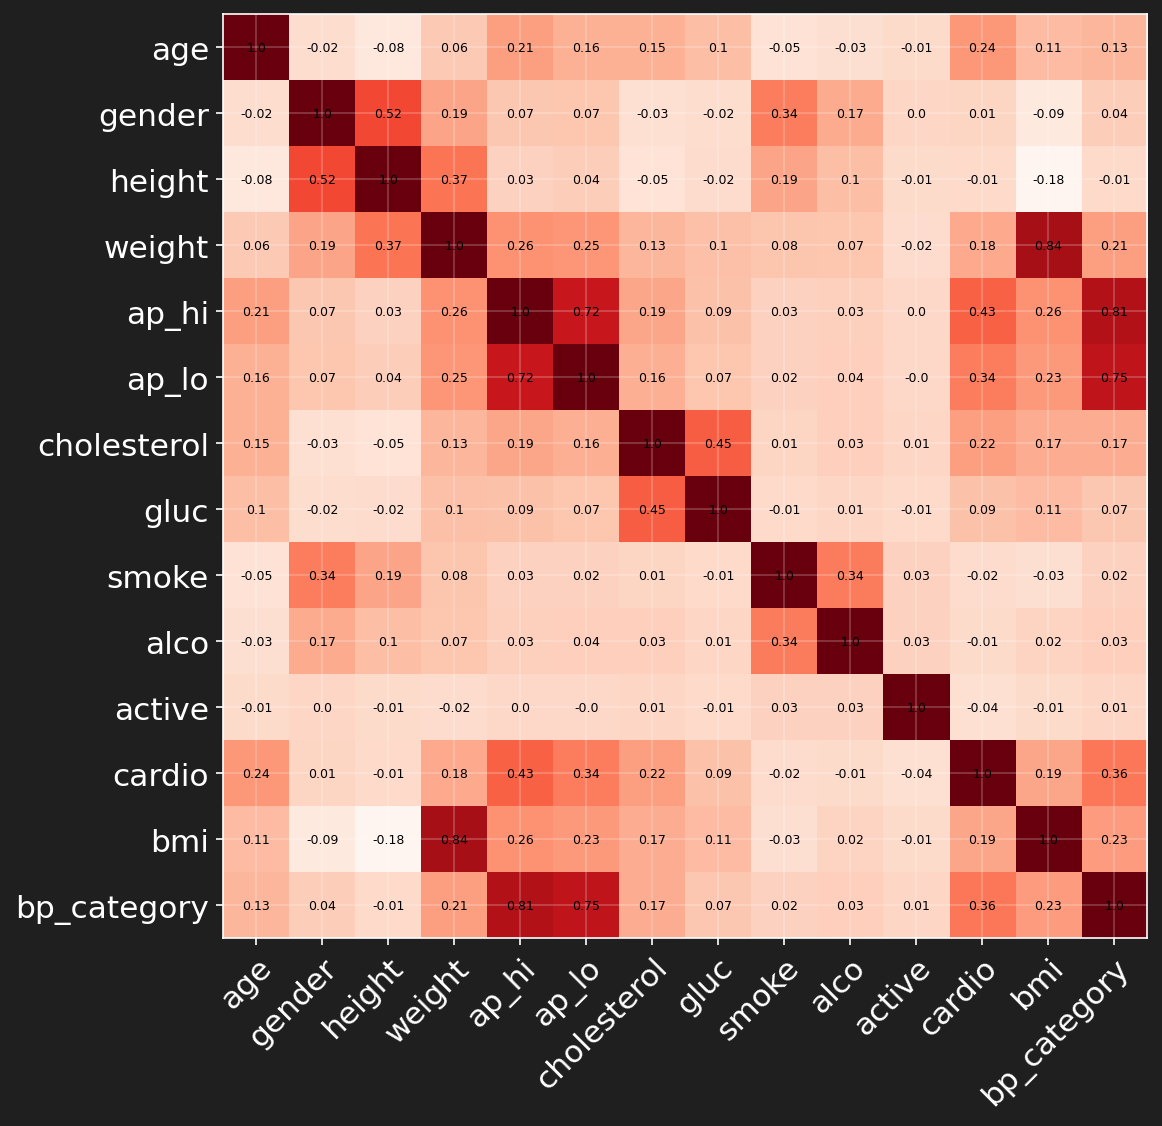

In [489]:
df_heatmap.corr()
cor = df_heatmap.corr()
fig, ax = plt.subplots( figsize=(16, 8))
im = ax.imshow(df_heatmap.corr(), cmap="Reds")
col=list(df_heatmap.columns)
ax.set_xticks(range(len(col)), labels=col, rotation=45, ha="right", rotation_mode="anchor" );
ax.set_yticks(range(len(col)), labels=col);

ncorr = np.round(cor.to_numpy()*100)/100
#ncorr = cor.to_numpy()
# text = ax.text(ncorr[:,0],ncorr[0,:], ncorr, ha="center", va="center", color="w")
idx = df_heatmap.index
for i in range(ncorr.shape[0]):
    for j in range(ncorr.shape[1]):
        text = ax.text(j,i, ncorr[i,j], ha="center", va="center", color="black", fontsize=6)
ncorr

There is no feature that has a high coliniarity with the target cardio, 
but ap_hi, ap_low, age, colestrol and weight all contribute and it makes sens to 
use them in the model. ap_hi and ap_low does have a high coliniarity with each other 
so combining them in to one feature might have been wise.

What is supising is that smoke, alco and active doesn't seem to have any corrleation to the 
target att all, and one could surmize that life style might not have such impact except 
pheraphs for food in the form of colestrol, allthough this could also be impacted by genetics.

In truth it does feel like we are missing some key feautre that would explain the correlation 
we seem to be non-present in the matirx. Perhaps some feture that contained some type 
of genetic information would prove revealing.

# Skapa två Datasets
___

In [490]:
#df_dummies = pd.get_dummies(df, drop_first=True)
df_a = df.drop(columns=["ap_hi", "ap_lo", "height", "weight", "bmi", "year", "id"])
df_a = pd.get_dummies(df_a, drop_first=True)
df_a.head()




# (?) Should i use drop_first
# (?) Should i convert gender in to text
df_b = df.drop(columns=["bmi", "bmi_category", "bp_category", "height", "weight", "year", "id"])
df_b = label_discreet(df_b, {"gender":{2:"female", 1:"male"}})
df_b = pd.get_dummies(df_b, drop_first=True)
df_b.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male
0,18393,110,80,1,1,0,0,1,0,False
1,20228,140,90,3,1,0,0,1,1,True
2,18857,130,70,3,1,0,0,0,1,True
3,17623,150,100,1,1,0,0,1,1,False
4,17474,100,60,1,1,0,0,0,0,True


# Välj Modeller
___

In [491]:
# Linear Regression  
# Polynomial Expansion X

# Logistic Regression - Stochastic Gradient Descent  

# Random Forest

# Knn 

# KMeans

# Gradient Boosting? 



In [492]:
df_b.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_male
0,18393,110,80,1,1,0,0,1,0,False
1,20228,140,90,3,1,0,0,1,1,True
2,18857,130,70,3,1,0,0,0,1,True
3,17623,150,100,1,1,0,0,1,1,False
4,17474,100,60,1,1,0,0,0,0,True


In [493]:
print( mop_a.df_compare_descreet )
print( mop_b.df_compare_descreet )

       Logistic. regr.
Score         0.712500
STD           0.027386
       Logistic. regr.
Score         0.737500
STD           0.050621


In [494]:
print( mop_a.df_compare )
print( mop_b.df_compare )

      Linear Regr. (SVD) scaled  Polyno. regr. Deg 2  Polyno. regr. Deg 3
MAE                    0.390532             0.403434             2.609981
MSE                    0.216671             0.245796            76.728967
RMSE                   0.465480             0.495778             8.759507
RSE                    0.504884             0.537747             9.501020
      Linear Regr. (SVD) scaled  Polyno. regr. Deg 2  Polyno. regr. Deg 3
MAE                    0.366784             0.378670             0.873780
MSE                    0.193685             0.219533             4.480602
RMSE                   0.440097             0.468544             2.116743
RSE                    0.461347             0.491167             2.218950


In [511]:
# Creates a list continga multiple lists of X & y with labels
def XYL_formating(df, X_labels, y_labels,  size ):
    XYL = [ 
        {"X":df[features].iloc[:size].values, "y":df[target].iloc[:size].values, "X_labels":features, "y_label":target} 
        for features, target in zip(X_labels, y_labels) ]
    return XYL

#size = 20000
size = 20000
X_labels = [
    ["height", "weight", "age"], 
    ["ap_hi", "ap_lo", "gender"]
]
y_labels = [ "cardio", "cardio"]
XYL = XYL_formating(df, X_labels, y_labels, size)

# Xs = [ df[Xs]  for Xs in X_labels ][:size] 
# ys = [ df[ys]  for ys in y_labels ][:size]
# ys



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import re

class ModelValidator:
    def __init__(self, XYL):
        self.XYL = XYL  # Contains the X, y and labels for each data set
        self.Xy_test_train_validate = list()
        self.scaler = StandardScaler()
        self.normalizer = Normalizer()
        self.model_results = list()
        self.best_combination = None
        

    def split(self, X, y):
        # tr = Train 
        # va = Validation (used during tuning of hyper parameters)
        # te = Test (used ofr the final test) 
        Xtr, Xte, ytr, yte  =  train_test_split(X, y, test_size=.3, random_state=42 )
        Xte, Xva, yte, yva  =  train_test_split(Xte, yte, test_size=.5, random_state=42 )
        self.Xy_test_train_validate.append([Xtr, Xte, Xva, ytr, yte, yva]) 
    

    def recall(self, TP, FN):
        return TP / (TP+FN)


    # Use max to pick the combo with based on highest recall
    def find_best_combination(self):
        self.best_combination = max(self.model_results, key=lambda di: di["recall"])


    def initiat_model_tuning(self):
        for ds_idx, data_set in enumerate(XYL):
            self.split(data_set["X"], data_set["y"])
            #for model in ["decision_tree", "knn", "svc", "logistic_regression"]:  
            for model in ["logistic_regression", "multinomial_nb"]:  
                self.execute_model_tuning(model, ds_idx) 


    def execute_model_tuning(self, model, ds_idx):
        Xtr, Xte, Xva, ytr, yte, yva = self.Xy_test_train_validate[ds_idx]

        models={
           "decision_tree":DecisionTreeClassifier,
           "knn":KNeighborsClassifier,
           "svc":SVC,
           "logistic_regression":LogisticRegression, 
           "multinomial_nb":MultinomialNB, 
       }
       
        param_grid={
            "decision_tree":{
                "decision_tree__criterion": ["gini", "entropy"],
                "decision_tree__max_depth": [3,6,9,12,15],
                "decision_tree__min_samples_split": [2,4,8,10],
                "decision_tree__min_samples_leaf": [1,3,6],
                "decision_tree__max_features": [ "sqrt", "log2", None],
            },

            "knn":{
                "knn__n_neighbors": [1, 2, 3, 5, 8, 13]
            },

            "svc":{
                    "svc__kernel":["linear", "rbf", "sigmoid"], 
                    "svc__C":[0.1, 1],
                    "svc__gamma":[1, 0.1, 0.0001]
                    #"svc__C":[0.1, 1, 10, 100, 1000],
                    #"svc__gamma":[1, 0.1, 0.01, 0.001, 0.0001]
            },
            "logistic_regression":{
                "logistic_regression__C": [0.001, 0.01, 0.1, 1, 10, 100],
                "logistic_regression__penalty": ["l1", "l2"],
                "logistic_regression__solver": ["liblinear", "saga"],
                "logistic_regression__max_iter": [100, 200, 300]
            },}

        pipe = Pipeline([
            ("scaler", self.scaler),
            ("normalizeer", self.normalizer), 
            (model, models[model]())
        ]) 


        classifier = GridSearchCV(
            estimator=pipe, 
            param_grid=param_grid[model], 
            cv=5, #Alsoe try 10 
            scoring="recall",
            n_jobs=-1,
            verbose=True
        )
        
        classifier.fit(Xtr, ytr)           
        y_hat = classifier.predict(Xva)

        # The paramaters keys needs to be formated if there to be passed in as arguments in dict form
        params = { re.sub(r"\w*__", "", key):val for key, val in classifier.best_params_.items() }  

        report = classification_report(yva, y_hat)
        cfm = confusion_matrix(yva, y_hat) 
        recall = self.recall(cfm[1,1], cfm[1,0]) 

        # Stores all the information about the best model in a list(dic())
        # this allows us to pick the best model/ds pair with the max() function
        # and we store the entire KNeighborsClassifier method so that we can 
        # impliment the best model dynamically using only the information in this 
        # model_result + the test data.
        self.model_results.append({
            "data_set":ds_idx, 
            "model":models[model], 
            "model_name":model, 
            "params":params, 
            "report":report, 
            "recall":recall, 
            "cfm":cfm,
        })



In [519]:
mv = ModelValidator(XYL)
mv.initiat_model_tuning()

# final_model = KNeighborsClassifier(**{'n_neighbors': 13})
# final_model.fit(XYL[0]["X"],XYL[0]["y"])

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [514]:
# 1.40
mv.model_results
mv.find_best_combination()
mv.best_combination

{'data_set': 0,
 'model': sklearn.linear_model._logistic.LogisticRegression,
 'model_name': 'logistic_regression',
 'params': {'C': 0.01,
  'max_iter': 100,
  'penalty': 'l1',
  'solver': 'liblinear'},
 'report': '              precision    recall  f1-score   support\n\n           0       0.64      0.61      0.62      1561\n           1       0.60      0.64      0.62      1439\n\n    accuracy                           0.62      3000\n   macro avg       0.62      0.62      0.62      3000\nweighted avg       0.62      0.62      0.62      3000\n',
 'recall': 0.635858234885337,
 'cfm': array([[947, 614],
        [524, 915]], dtype=int64)}

In [499]:
# params = mv.model_results[0]["KNN"]["params"]
# final_model = KNeighborsClassifier(**params)
# final_model.fit(XYL[0]["X"],XYL[0]["y"])

In [501]:
# Precsision   = True Positives / (True Positives + False Positives)
# Recall       = True Positives / (True Positives + False Negatives)
# f1-score     = 2 * (Precision * Recall) / (Precision + Recall)
# Accuracy     = (True Positives + True Negatives) / Total Cases
# Support      = How many of each case
# macro avg    = The average of each score between the classes
# weighted avg = Same as macro avg but adjusts for support aka the balans of each case

# (?) Double check : Recall 1 is the one where trying to get as high as possible
# 1 means that we think there not positive and they are not positive 100%
# I might add in precision to but maybe give it 25% of the weight, maybe
#print(mv.model_results[0]["KNN"]["report"])
#mv.model_results[0]["KNN"]["report"]



              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2059
           1       0.65      0.64      0.64      1941

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



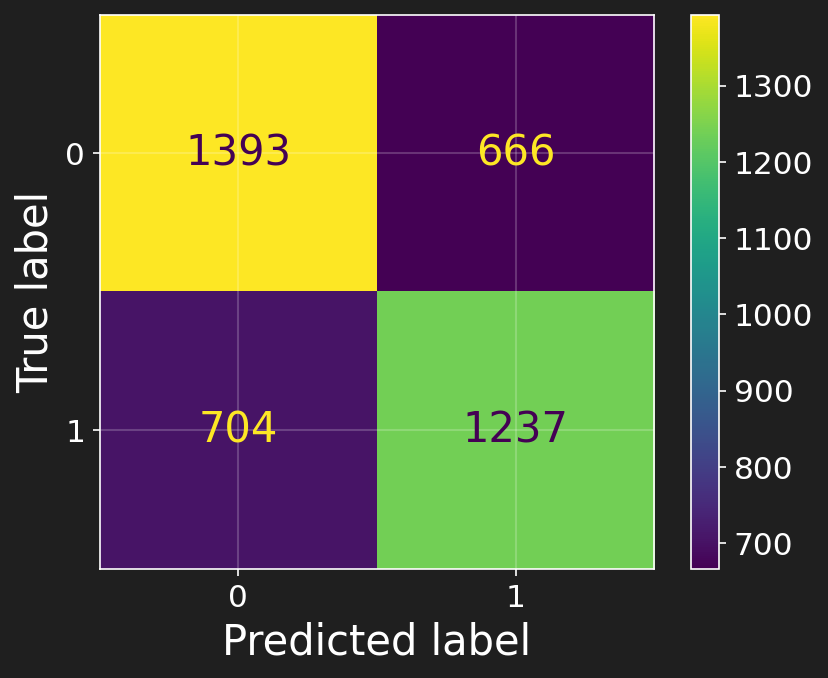

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_hat = classifier_KNN.predict(Xte)
print(classification_report(yte, y_hat))

cfm = confusion_matrix(yte, y_hat)
ConfusionMatrixDisplay(cfm).plot(  ) # .plot(cmap=plt.cm.Blues)
